In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras import *
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_s_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
# fix random seed for reproducibility
np.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [22]:
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Documents/projet AFD 2018/AFD/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]


X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)




In [23]:
Y.shape

(20482,)

In [24]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

print(y_encode_binaire)

[2 2 0 ... 1 0 0]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [7]:
print(y_encode_binaire)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [8]:
X #exemple X


array([[-1.45240564, -0.5225527 , -0.50074042, ...,  0.85178807,
         0.41758741, -0.82643141],
       [-0.33318022,  2.9795954 ,  3.32352667, ..., -1.21685247,
        -0.17523392, -0.60309252],
       [-0.89279293, -1.00229902, -1.0907702 , ...,  0.95029477,
        -0.09429245,  0.57178261],
       ...,
       [ 0.22643249, -0.40261612, -0.25489468, ..., -1.70938594,
        -1.08057928,  2.26100449],
       [-0.05337386, -0.11476833, -0.09099752, ..., -0.13327885,
        -0.29065047,  0.39901299],
       [-0.05337386, -0.78641317, -0.69195378, ..., -1.31535917,
        -1.11505435,  1.37672014]])

In [15]:

# create model
model = Sequential()
model.add(Dense(50, input_dim=58,kernel_initializer='normal', activation='relu'))#

model.add(Dense(500, activation='relu'))
model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct


In [16]:

# Compile model
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])#adamax

In [17]:
# Fit the model
model.fit(X, y_encode_binaire, epochs=100, batch_size=32)

Epoch 1/100
20482/20482 [==============================] - 1s 62us/step - loss: 1.0975 - acc: 0.5655
Epoch 2/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.7869 - acc: 0.7087
Epoch 3/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.7318 - acc: 0.7238
Epoch 4/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.6998 - acc: 0.7364
Epoch 5/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.6741 - acc: 0.7465
Epoch 6/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.6541 - acc: 0.7527
Epoch 7/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.6365 - acc: 0.7589
Epoch 8/100
20482/20482 [==============================] - 1s 63us/step - loss: 0.6218 - acc: 0.7630
Epoch 9/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.6103 - acc: 0.7653
Epoch 10/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.5998 - a

20482/20482 [==============================] - 1s 56us/step - loss: 0.4246 - acc: 0.8424
Epoch 82/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.4233 - acc: 0.8392
Epoch 83/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.4224 - acc: 0.8416
Epoch 84/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.4221 - acc: 0.8400
Epoch 85/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.4203 - acc: 0.8437
Epoch 86/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.4206 - acc: 0.8424
Epoch 87/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.4199 - acc: 0.8413
Epoch 88/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.4186 - acc: 0.8429
Epoch 89/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.4169 - acc: 0.8423
Epoch 90/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.4157 - acc: 

In [3]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

NameError: name 'model' is not defined

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(6828,)


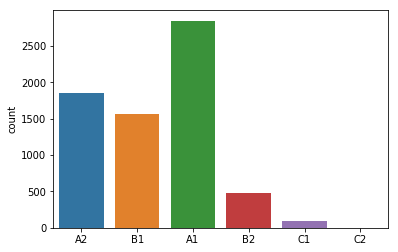

In [74]:
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)


import seaborn as sns
import matplotlib.pyplot as plt

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


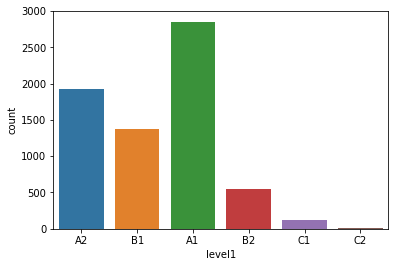

(6828,)

In [78]:
sns.countplot(Y_test,label="Count")
plt.show()
Y_test.shape

In [28]:

lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X, Y)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

Accuracy of LDA classifier on training set: 0.73
Accuracy of LDA classifier on test set: 0.73


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [58]:

'''n=1500
X, y = make_blobs(n_samples = n, 
                  n_features = 6,
                  random_state = 42)
plt.scatter(X[:,0], X[:,5])

kmeans = KMeans(n_clusters = 6, random_state = 0)                   
kmeans.fit(X)                  
plt.scatter(X[:, 0], X[:, 5],c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'white')'''

"n=1500\nX, y = make_blobs(n_samples = n, \n                  n_features = 6,\n                  random_state = 42)\nplt.scatter(X[:,0], X[:,5])\n\nkmeans = KMeans(n_clusters = 6, random_state = 0)                   \nkmeans.fit(X)                  \nplt.scatter(X[:, 0], X[:, 5],c = kmeans.labels_)\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'white')"

(1500, 6)
(1500, 6)
(1500,)
(20482,)


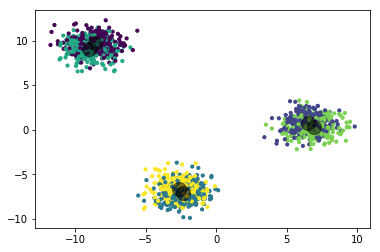

In [60]:
print(X.shape)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(X.shape)
plt.scatter(X[:, 0], X[:, 5], c=y_kmeans, s=10, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 5], c='black', s=200, alpha=0.5);

print(kmeans.labels_.shape)
print(Y_numerique.shape)

#metrics.adjusted_rand_score(kmeans.labels_, Y_numerique)